*Adapted from: https://keras.io/examples/vision/mnist_convnet/*

# Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras import layers
keras.backend.backend()

'tensorflow'

# Load the data

In [5]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 19s 0us/step


# Display the data

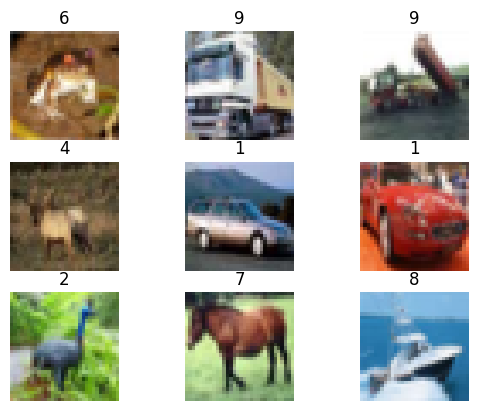

In [6]:
plt.clf()
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.title(y_train[i][0])
    plt.axis("off")

plt.show()

# Prepare the data

In [7]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# Model / data parameters
num_classes = 10
input_shape = x_train.shape[1:]
print(input_shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
(32, 32, 3)


# Build the model

In [8]:
model = keras.Sequential(
    [
        layers.InputLayer(input_shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)), # for every 2x2 block in the image, find the largest value...so downsizing by a factor of 4
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5), # randomly turn off 50% of the input from the prev layer
        layers.Dense(num_classes, activation="softmax"), # fully connected output layer 
    ]
)

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dropout (Dropout)           (None, 2304)             

# Train the model

In [9]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15


352/352 [==============================] - 16s 35ms/step - loss: 1.6880 - accuracy: 0.3894 - val_loss: 1.3871 - val_accuracy: 0.5076
Epoch 2/15
352/352 [==============================] - 12s 33ms/step - loss: 1.3918 - accuracy: 0.5058 - val_loss: 1.2620 - val_accuracy: 0.5562
Epoch 3/15
352/352 [==============================] - 12s 33ms/step - loss: 1.2816 - accuracy: 0.5540 - val_loss: 1.1834 - val_accuracy: 0.5894
Epoch 4/15
352/352 [==============================] - 12s 34ms/step - loss: 1.2110 - accuracy: 0.5767 - val_loss: 1.1109 - val_accuracy: 0.6204
Epoch 5/15
352/352 [==============================] - 12s 34ms/step - loss: 1.1630 - accuracy: 0.5942 - val_loss: 1.0806 - val_accuracy: 0.6348
Epoch 6/15
352/352 [==============================] - 12s 34ms/step - loss: 1.1226 - accuracy: 0.6123 - val_loss: 1.0264 - val_accuracy: 0.6490
Epoch 7/15
352/352 [==============================] - 12s 34ms/step - loss: 1.0895 - accuracy: 0.6210 - val_loss: 0.9988 - val_accura

# Evaluate the trained model

We expect about 68%-70% test accuracy here which is a notable improvement over the basic neural network and not too bad for a relatively simple convolution neural network and not too much training.

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.908725380897522
Test accuracy: 0.692300021648407
